### Practice: Multiple Line Regression

In [27]:
# 필요한 라이브러리 호출
import torch
import torch.nn.functional as F
from torch.nn import Linear, MSELoss, Sequential
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
# 데이터 불러오기
df = pd.read_csv('data/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
# feature data 추출하기
x_data = df.iloc[:, :-1].values # 모든 row
y_data = df.iloc[:, [-1]].values # col : 주택 중위 가격

In [30]:
x_data.shape

(506, 13)

In [31]:
y_data.shape

(506, 1)

In [32]:
# 텐서 노드 만들기
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

In [33]:
# 학습
model = Sequential()
model.add_module('nn', Linear(13, 1))
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

for epoch in range(2000):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(f'{epoch} - cost : {cost.item()}')

0 - cost : 30527.845703125
1 - cost : 6849.78466796875
2 - cost : 309.6484069824219
3 - cost : 5081.751953125
4 - cost : 10409.115234375
5 - cost : 10665.697265625
6 - cost : 7162.146484375
7 - cost : 2995.264892578125
8 - cost : 491.24432373046875
9 - cost : 460.0146179199219
10 - cost : 2155.732177734375
11 - cost : 3975.053955078125
12 - cost : 4631.07861328125
13 - cost : 3864.81396484375
14 - cost : 2290.64208984375
15 - cost : 823.0842895507812
16 - cost : 144.76113891601562
17 - cost : 401.8500061035156
18 - cost : 1204.318603515625
19 - cost : 1923.037841796875
20 - cost : 2096.05224609375
21 - cost : 1666.806396484375
22 - cost : 935.8698120117188
23 - cost : 324.5480041503906
24 - cost : 120.01884460449219
25 - cost : 333.1252746582031
26 - cost : 730.3204956054688
27 - cost : 1007.950927734375
28 - cost : 987.6417846679688
29 - cost : 704.5966186523438
30 - cost : 350.4135437011719
31 - cost : 131.16445922851562
32 - cost : 138.7313232421875
33 - cost : 309.93096923828125
34

In [34]:
# 학습된 weight 값 확인
model[0].weight

Parameter containing:
tensor([[-0.0921,  0.0557, -0.0418,  2.9148,  1.6211,  5.0695, -0.0070, -0.9862,
          0.1792, -0.0107, -0.3339,  0.0141, -0.4841]], requires_grad=True)

In [35]:
# 학습된 bias 값 확인
model[0].bias

Parameter containing:
tensor([3.8047], requires_grad=True)

In [36]:
# 예측해보기 : 0번째 행 - 집값 예측하기
list = df.iloc[0, 0:13].to_numpy()
model(torch.FloatTensor([list]))
# model(torch.FloatTensor(x_data[0]).reshape(1, -1))

tensor([[29.5258]], grad_fn=<AddmmBackward>)

In [40]:
# 전체 행에 대한 가격 예측하기
pred = model(x)
pred

tensor([[29.5258],
        [24.3759],
        [30.7898],
        [29.7006],
        [29.2689],
        [25.6250],
        [21.6078],
        [18.5880],
        [10.3189],
        [18.0211],
        [18.5506],
        [20.4305],
        [19.6254],
        [21.3920],
        [21.0132],
        [20.9326],
        [22.3869],
        [18.6435],
        [16.7677],
        [19.5563],
        [13.5925],
        [19.1884],
        [17.7627],
        [15.3477],
        [17.4034],
        [14.3669],
        [17.0709],
        [16.2759],
        [21.8436],
        [23.2804],
        [12.9311],
        [19.6078],
        [10.1585],
        [15.3392],
        [14.7900],
        [23.0667],
        [21.5170],
        [22.7060],
        [22.7428],
        [31.7350],
        [35.0839],
        [28.0586],
        [24.4863],
        [24.0658],
        [22.0218],
        [20.4973],
        [19.1192],
        [17.0964],
        [ 7.8936],
        [16.0166],
        [20.2164],
        [22.7935],
        [27.

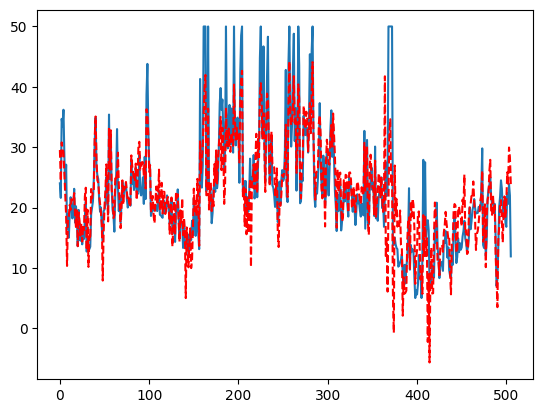

In [43]:
# price 실제값과 예측값 그려보기
plt.plot(y_data)
plt.plot(pred.detach().numpy(), 'r--')